<a href="https://colab.research.google.com/github/AmirRazaMBA/TF_CertificationExam/blob/main/Introduction%20to%20TensorFlow/02_simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [3]:
layer_0 = Dense(units=4, input_shape=[1])
layer_1 = Dense(units=4)
layer_2 = Dense(units=1)

model = Sequential()
model.add(layer_0)
model.add(layer_1)
model.add(layer_2)

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

#  Layer 0 : weights 1 x 4 and bias 4  ; Layer 1 : weights 4 x 4 and bias 4 ; Layer 3 : weights 4 x 1 and bias = 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [4]:
import os, datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [5]:
history = model.fit(x=celsius_q, y=fahrenheit_a, epochs=500, verbose=False ,callbacks=[tensorboard_callback])

Instructions for updating:
use `tf.profiler.experimental.stop` instead.


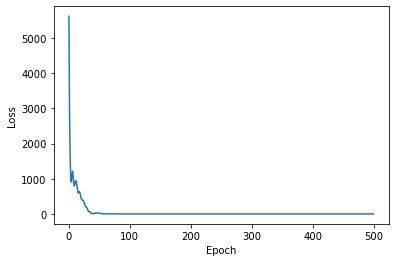

In [6]:
# Check any change in the loss when more layers are added compared to one layer in the last ex?
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [7]:
print(model.predict([100.0]))

[[211.74744]]


In [8]:
# Note the formula is F = 1.8 * C + 32    , where weight is 1.8 and bias is 32 if only one layer and one unit
print("These are the layer_0 variables: " + str(layer_0.get_weights()) + "\n")
print("These are the layer_1 variables: " + str(layer_1.get_weights()) + "\n")
print("These are the layer_2 variables: " + str(layer_2.get_weights()) + "\n")

These are the layer_0 variables: [array([[ 0.11625505,  0.00854711, -1.0233889 , -0.12403804]],
      dtype=float32), array([-0.5084694,  3.3236654, -3.7063444,  2.1622183], dtype=float32)]

These are the layer_1 variables: [array([[ 0.07306272, -0.91397655, -0.14312185,  0.0829343 ],
       [-1.0654318 ,  0.60883296, -0.2897633 , -0.55402315],
       [ 0.8605216 , -0.7943213 , -0.42643368,  1.1920319 ],
       [-1.0426675 ,  0.11305431, -0.02848387, -0.12117054]],
      dtype=float32), array([-3.8275437,  2.2789412, -3.287507 , -2.8133736], dtype=float32)]

These are the layer_2 variables: [array([[-1.4277686 ],
       [ 0.34382105],
       [-0.601749  ],
       [-0.6147377 ]], dtype=float32), array([3.5064092], dtype=float32)]



In [9]:
%load_ext tensorboard
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12988.

In [10]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs (started 0:00:52 ago; pid 11508)


In [11]:
notebook.display(port=6006, height=500)

Selecting TensorBoard with logdir logs (started 0:00:52 ago; port 6006, pid 11508).


In [ ]:
'''
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

# Control TensorBoard display. 
# If no port is provided then most recent TensorBoard

notebook.display(port=6006, height=500)
'''